<a href="https://colab.research.google.com/github/huzaifahtariqahmed/CNN-Based-CIFAR-10-Image-Classification-Model/blob/main/Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: Image Classification using a Convolutional Neural Network (CNN)

<a name="toc_40291_2"></a>
# Objective



In this Lab we are going to classify a new set of images in 10 classes (multi-class classification) using a Convolutional Neural Network (CCN).
The CIFAR-10 dataset consists of 60,000 colour images in 10 classes. Each class has 6,000 images. There are 10 different classes of objects. All the images have a size of 32x32 pixels. You can see examples of the images in this dataset in fig 1.



<div>
<img src="https://drive.google.com/uc?export=view&id=1UF0myb6ed9Mzgf2-rGUbfHUFrUDYQ5dh" width="600"/>
</div>


To classify these objects, we are going to do the following steps:

•	Create a Convolutional Neural Network (CNN) and train it to be able to classify these images.

•	Test your model performance using validation metrics



# Environment set up

For this lab we are going to use Python as our programming language and Keras from Tensorflow as our machine learning platform. You can use Keras documentation from https://keras.io/  for extra help.

# Importing libraries and data pre-processing

To start, load your dataset into train and test sets and create your validation set by spliiting your train data.  


*   Print the shape of the first image in the training set.

If you check the shape of your y_train and y_test you will notice that they are 2-dimensional arrays. We need to flatten these arrays to 1 dimension before using them. Implement the following steps:



1.   Load the **Cifar10** dataset using **.load_data**. Note that you have
already imported **cifar10** from **keras.datasets**. You can view what this function returns [here](https://keras.io/api/datasets/cifar10/#load_data-function).
2. Shuffle **x_train** and **y_train** using **shuffle**.
3.   To standardize the data, rescale **x_train** and **x_test** from range **0-255** to range **0-1**.
4. Split your train data into train and validation data using **train_test_split()**. We want the training data to be 80% of our dataset.
5.  	Define a new variable for the number of the classes (in this case we have 10 classes).
6.  	One-hot encode **y_train**, **y_val** and **y_test** using **to_categorical** function (import it from keras.utils). One0hot encoding essentially ensures that our model does not assume that higher numbers are more important. So, if you try printing **y_train**, you will observe that it gives a numerical label to each of the training image and does not assign any degree of importance. To avoid this, we use hot encoding to conver catogorical data into vectors for each of the image containing 1s and 0s. For a better understanding, you can watch [this](https://www.youtube.com/watch?v=v_4KWmkwmsU) video on one-hot encoding.







In [56]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras import layers, models, losses

In [57]:
#load cifar10 dataset here #_________TODO_________
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [58]:
#shuffle dataset here #_________TODO_________
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

In [59]:
#normalize your data #_________TODO_________
x_train = x_train / 255.0
x_test = x_test / 255.0

In [60]:
#split your data #_________TODO_________
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [61]:
#define number of classes #_________TODO_________
num_classes = 10;

In [62]:
#one-hot encode the labels
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot  = to_categorical(y_test, num_classes=10)
y_val_1hot   = to_categorical(y_val, 10)

print('1hot shapes: (train, test, val) :- ', y_train_1hot.shape,y_test_1hot.shape, y_val_1hot.shape)

1hot shapes: (train, test, val) :-  (40000, 10) (10000, 10) (10000, 10)


In [63]:
#Print the shape of the first image in the training set.
#_________TODO___________
print(x_train[0].shape)

(32, 32, 3)


# Building the model





Implement the following steps:


*   Build a keras Sequential model
*	Add a **conv2D** layer with **32** output features, **3*3 kernel** , **relu** activation
function and **input_shape=shape of your images** (width, hight, color channels).
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **conv2D** layer with **64** output features, **3*3 kernel** and **relu** activation function.
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **conv2D** layer with **128** output features, **3*3 kernel** and **relu** activation function.
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **Flatten** layer.
*	Add a **Dense** layer with **512** output features and relu activation function.
*	Add your final Dense layer with number of **output features= number of classes** and Softmax activation function.

After you built your model, you need to compile the model. Implement the following steps in your notebook in a new code cell:
* Compile your model with **model.compile()** using **SGD** as your optimizer. **categorical_crossentropy** as your loss function and Accuracy as your metric.
* Train your model with **model.fit()** with **15** epochs and store the results in a variable.

You can view the Model Training Keras APIs [here](https://keras.io/api/models/model_training_apis/).



In [64]:
model = keras.Sequential([
    #add conv2D layer #_______TODO_______
    layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),

    #add maxpooling2D layer #_______TODO_______
    layers.MaxPooling2D(pool_size=(2, 2)),

    #add conv2D layer #_______TODO_______
    layers.Conv2D(64, (3,3), activation='relu'),

    #add maxpooling2D layer #_______TODO_______
    layers.MaxPooling2D(pool_size=(2, 2)),

    #add conv2D layer #_______TODO_______
    layers.Conv2D(128, (3,3), activation='relu'),

    #add maxpooling2D layer #_______TODO_______
    layers.MaxPooling2D(pool_size=(2, 2)),

    #add flatten layer #_______TODO_______
    layers.Flatten(),

    #add dense layer   #_______TODO_______
    layers.Dense(512, activation='relu'),

    #add dense layer   #_______TODO_______
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
#compile model-> compile means to configure training in Keras API
optimizer = keras.optimizers.SGD() # define SGD as your gradient descent algorithm
model.compile(optimizer = optimizer,
              loss = losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

None


# Training the model

In [66]:
#train the model #_______TODO_______
trained_model = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_val, y_val)
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.1581 - loss: 2.2205 - val_accuracy: 0.2880 - val_loss: 1.9623
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.3059 - loss: 1.9022 - val_accuracy: 0.3829 - val_loss: 1.7017
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 72ms/step - accuracy: 0.3973 - loss: 1.6760 - val_accuracy: 0.4318 - val_loss: 1.5421
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 64ms/step - accuracy: 0.4554 - loss: 1.5175 - val_accuracy: 0.4921 - val_loss: 1.4106
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.4891 - loss: 1.4268 - val_accuracy: 0.5174 - val_loss: 1.3358
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.5277 - loss: 1.3334 - val_accuracy: 0.5378 - val_loss: 1.3269
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.5522 - loss: 1.2702 - val_accuracy: 0.5726 - val_loss: 1.2196
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.5731 - loss: 1.

# Evaluate the model

Implement the following steps:
* Plot training and validation loss of your model (1 plot)
*	Plot training and validation accuracy of your model (1 plot)
*	Print loss and accuracy of your model using **model.evaluate()**
*	Plot your confusion matrix

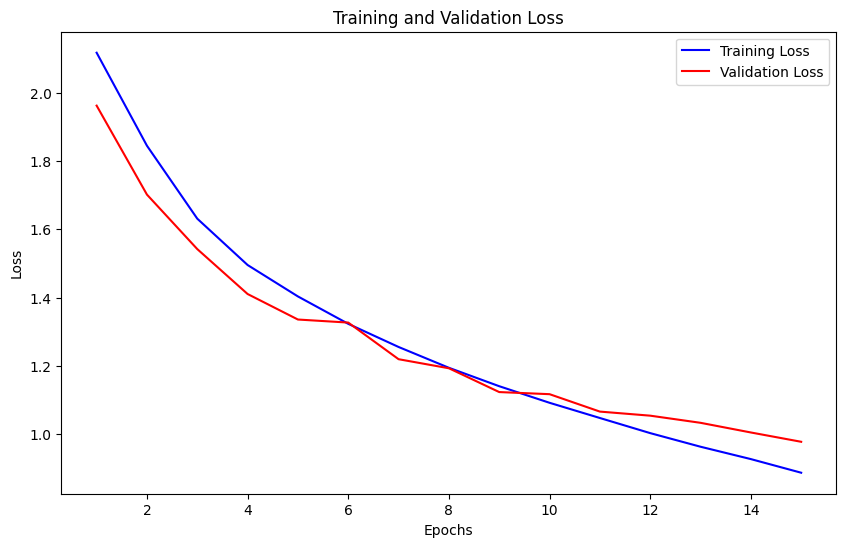

In [67]:
#plot loss using plt.plot() and plt.legend() #_______TODO_______
train_loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

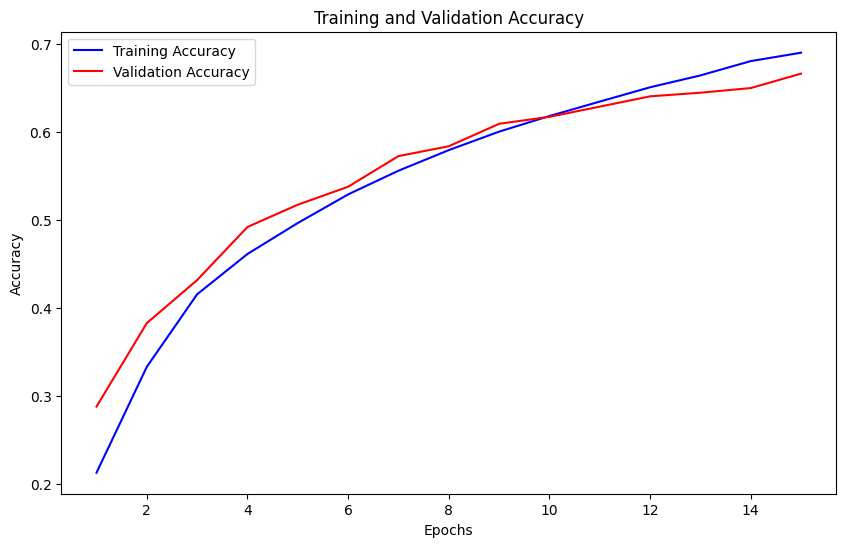

In [68]:
#plot accuracy using plt.plot() and plt.legend() #_______TODO_______
train_acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate using model.evaluate() #_______TODO_______
print("Evaluate on test data")
results = trained_model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

In [ ]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


#plot the CM
p_test= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm,classes=labels)

## Questions: Part 1
Once you finish coding answer these questions here in red font:

* How is the performance of your model based on the validation set and plots?

<font color='red' size=4>
Answer here
</font>

* Where is the highest inaccuracy of your model in the confusion matrix? Which labels your model confuses the most? Why do you think it happens?

<font color='red' size=4>
Answer here
</font>

* Report loss and accuracy of your model using model.evaluate() on the test set (write the numbers here because we are going to modify the code in the next sections).

<font color='red' size=4>
Answer here
</font>


* Report on how it compares to the performance of the model using your training and validation sets.

<font color='red' size=4>
Answer here
</font>



# Model improvement

Now we want to improve the performance of the classifer by tunning hyperparameters and modifying the model architecture. We will use multiple approaches for this purpose:


**1. Adding more Convolutional layers**:

*  	After each **Conv2D** layer add another **Conv2D** layer with the same parameters as the layer above so that you have 3 pairs of identical layers in sequence


**2. Padding:**

the convolutional layers reduce the size of the output. So in cases where we want to increase the size of the output and save the information presented in the corners we can use padding layers where padding helps by adding extra rows and columns on the outer dimension of the images. So the size of input data will remain similar to the output data.

There are three types of padding: Same padding, Causal padding, and Valid padding

* Add **padding=’same’** to each of your Conv2D layer

**3. Batch Normalization layer**

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. Batch normalization prevents our NN from exploding gradient issue, and additionally to reduce overfitting.
* add a **BatchNormalization** layer after each Conv2D layer and the first Dense layer

**4. Dropout layer:**

By adding a dropout layer, you will drop out the nodes (input and hidden layer) in your neural network. All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of **p**. The dropout allows our NN to become weight-independent during the training process by randomly dropping weights in a chosen layer.
* After each **Maxpooling** add a **Dropout layer** with the values of **p=0.2**, **p=0.3** and **p=0.4** respectively.
* After your **Flatten layer**, add a **Dropout layer** with **p=0.2** chance.
*   Add another dropout layer with **p=0.2** after your first **Dense layer**.

**5. Learning rate:**

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

* Change your optimizer to **Adam** with **learning rate= 0.001**.
* set your **batch_size** to **128**.

* Now train your model again.







In [ ]:
# write your code for updated model here

## Questions: Part 2

* Report loss and accuracy of your model using model.evaluate() on the test set.
* Report on how it compares to the performance of the model using your training and validation sets.

<font color='red' size=4>
Answer here
</font>





## Missclassified Data
We are going to print out some of the missclassified data and check them visually

In [ ]:
"""check some missclassified images"""
misclassified_idx = [i for i, (x, y) in enumerate(zip(y_test, p_test)) if x != y]
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
plt.subplot(1, 3, 2)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
plt.subplot(1, 3, 3)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))



## Questions: Part 3
*	Print some of the misclassified images. Why do you think they were misclassified?

<font color='red' size=4>
Answer here
</font>

*	Suggest 2 methods (other than what we saw on this notebook) that you can use to improve the performance of the classifier

<font color='red' size=4>
Answer here
</font>

# Deliverable
You should submit your Colab notebook in `.ipynb` format on LMS containing your code implementations in **EXECUTED** code cells (thus, showing the output of the cell), and include the answers to the questions of this notebook in the dedicated code cells (using red text).
